딥러닝입문 4장 _ 신경망 적용해보기

In [1]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data(path = 'mnist.npz')

In [2]:
print(x_train.shape, y_train.shape)
print(y_train)
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


In [3]:
# 데이터 불러와서 테스트세트와 트레이닝세트를 나누었다.
# 교육세트는 6만개의 데이터이고 28 * 28의 행렬로 이루어져있다.
# 교육세트는 0 - 9까지 숫자로 이루어진 데이터를 가진다.
# 테스트세트는 1만개의 28 * 28의 행렬로 이루어져있고 동일하게 0 - 9까지 숫자로 이루어진 데이터다.
# x는 이미지파일. y는 숫자(타켓) 이다.

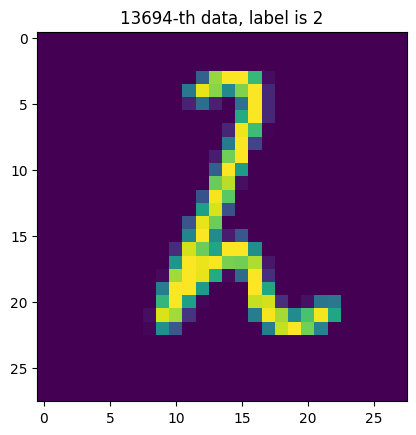

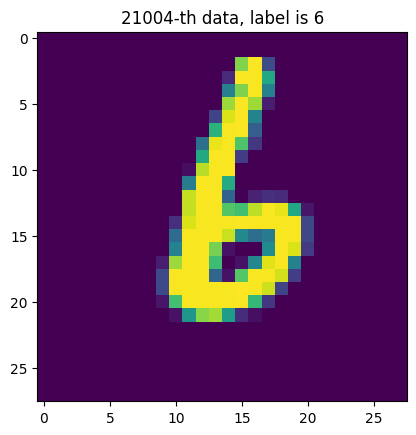

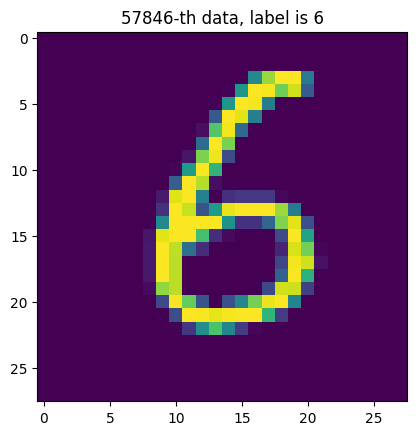

In [4]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 3

random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx:
    img = x_train[idx, :]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)


    plt.title('%d-th data, label is %d' % (idx, label))


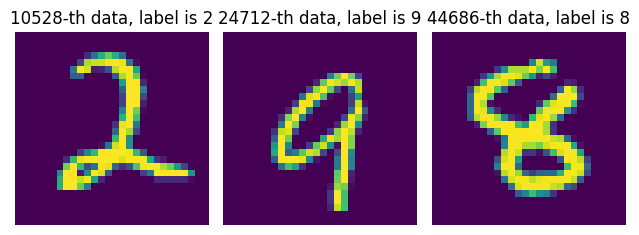

In [5]:
# 이미지를 가로로 출력하기 위해 GPT를 통해 수정한 코드

import matplotlib.pyplot as plt
import numpy as np

sample_size = 3  # 출력할 이미지 개수

random_idx = np.random.randint(60000, size=sample_size)

# sample_size 개수만큼의 subplot을 한 행에 출력
for i, idx in enumerate(random_idx):
    img = x_train[idx, :]  # 이미지 데이터
    label = y_train[idx]    # 해당 이미지의 레이블

    plt.subplot(1, sample_size, i + 1)  # 1행, sample_size열의 서브플롯 생성
    plt.imshow(img)  # 이미지 출력
    plt.title('%d-th data, label is %d' % (idx, label))  # 제목 설정
    plt.axis('off')  # 축 제거

plt.tight_layout()  # 그래프 간격 조정
plt.show()

# 코드에서 이해되지 않았던 점, i의 범위는 어떻게 정해지는 건가!
# sample_size를 3으로 설정했기 때문에 random_idx는 3개의 난수로 이루어짐, enumerate는 리스트의 인덱스(i)와 인덱스 값(랜덤하게 6만개 샘플 사이 3개)

In [6]:
# 처음에 나온 훈련데이터를 다시 훈련과 검증데이터로 나눔, 비율은 8 : 2 로 나눔
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


In [7]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28*28)))/255
x_val = (x_val.reshape((num_x_val, 28*28)))/255
x_test = (x_test.reshape((num_x_test, 28*28)))/255

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [8]:
# x_train.shape이 (60000, 28, 28)이면, x_train.shape[0]은 60000입니다.
# 모델에 입력하기 위해 784의 행으로 이루어진 데이터로 변경

In [9]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train, "|n")
print(y_val, "|n")
print(y_test, "|n")

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] |n
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] |n
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] |n


In [10]:
# 텐서플로의 케라스라이브러리에서 Sequential 이라는 크래스(모델)을 불러옴

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# 3개의 층을 가지는 Sequential 모델
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

c:\Dev\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# 소프트맥스와 시그모이드 값의 비교

def softmax(arr):
    m = np.max(arr)
    arr = arr - m
    arr = np.exp(arr)
    return arr / np.sum(arr)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision = 3)
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [12]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [13]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 32, validation_data = (x_val, y_val))

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8169 - loss: 0.6270 - val_acc: 0.9377 - val_loss: 0.2077
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9518 - loss: 0.1688 - val_acc: 0.9539 - val_loss: 0.1551
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.9669 - loss: 0.1146 - val_acc: 0.9589 - val_loss: 0.1383
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9743 - loss: 0.0877 - val_acc: 0.9666 - val_loss: 0.1128
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9787 - loss: 0.0711 - val_acc: 0.9632 - val_loss: 0.1264
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9813 - loss: 0.0612 - val_acc: 0.9690 - val_loss: 0.1086
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9845 - loss: 0.0520 - val_acc: 0.9676 - val_loss: 0.1118
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9861 - loss: 0.0433 - val_acc: 0.9695 - val_loss: 0.1112
Epoch 9/30
1313/1313 ━━━━━━━━━━━━━━━━━━━

In [14]:
history.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

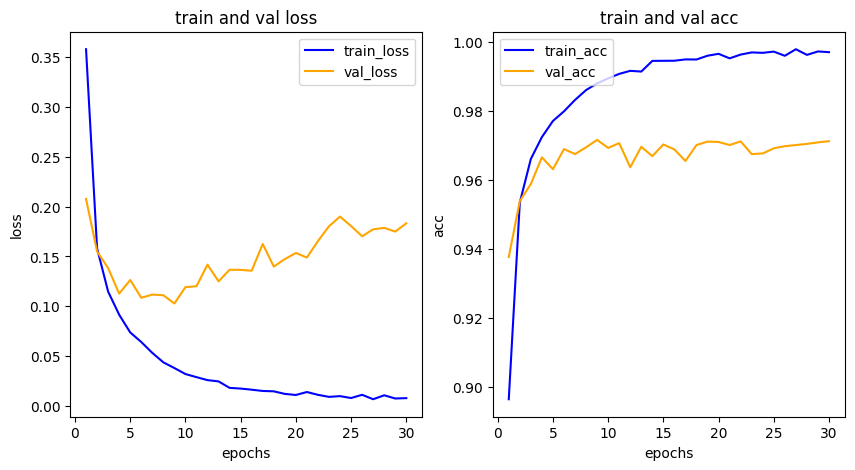

In [15]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend(loc = 'upper right')

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend(loc = 'upper left')

plt.show()

#에포크별 손실 및 정확도 그래프 legend()에서 loc = 'upper left, upper right'로 범례를 상단 좌우에 위치시켰음, 미지정시 적적한 위치로 자동 조정

In [16]:
"""
일반적인 위치 값
'upper right': 범례를 상단 오른쪽에 위치시킵니다.
'upper left': 범례를 상단 왼쪽에 위치시킵니다.
'lower right': 범례를 하단 오른쪽에 위치시킵니다.
'lower left': 범례를 하단 왼쪽에 위치시킵니다.
'right': 범례를 오른쪽 중앙에 위치시킵니다.
'center left': 범례를 왼쪽 중앙에 위치시킵니다.
'center right': 범례를 오른쪽 중앙에 위치시킵니다.
'lower center': 범례를 하단 중앙에 위치시킵니다.
'upper center': 범례를 상단 중앙에 위치시킵니다.
'center': 범례를 중앙에 위치시킵니다.
"""

"\n일반적인 위치 값\n'upper right': 범례를 상단 오른쪽에 위치시킵니다.\n'upper left': 범례를 상단 왼쪽에 위치시킵니다.\n'lower right': 범례를 하단 오른쪽에 위치시킵니다.\n'lower left': 범례를 하단 왼쪽에 위치시킵니다.\n'right': 범례를 오른쪽 중앙에 위치시킵니다.\n'center left': 범례를 왼쪽 중앙에 위치시킵니다.\n'center right': 범례를 오른쪽 중앙에 위치시킵니다.\n'lower center': 범례를 하단 중앙에 위치시킵니다.\n'upper center': 범례를 상단 중앙에 위치시킵니다.\n'center': 범례를 중앙에 위치시킵니다.\n"

In [17]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - acc: 0.9665 - loss: 0.2094


[0.17403367161750793, 0.9718999862670898]

In [18]:
import numpy as np

results = model.predict(x_test)  # 모델을 사용해 테스트 데이터를 예측
print(results.shape)  # 예측 결과의 형태 출력

np.set_printoptions(precision=7)  # 넘파이 소수점 출력 precision 설정
print(f'각 클래스에 속할 확률 : \n{results[0]}')  # 첫 번째 샘플에 대한 예측 결과 출력


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
(10000, 10)
각 클래스에 속할 확률 : 
[4.7785405e-18 1.4328165e-15 5.4491078e-11 6.3908302e-11 1.6862495e-30
 1.0614937e-15 1.9740107e-26 1.0000000e+00 8.3435516e-18 1.9504579e-15]


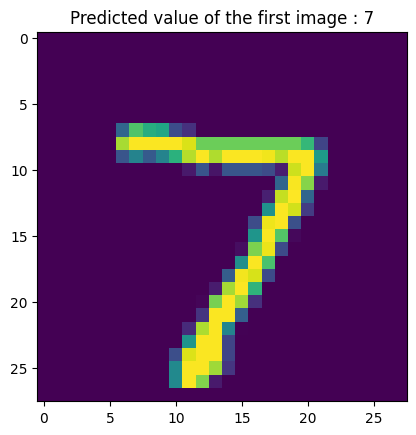

In [19]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1)
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]))
plt.show()

In [22]:
pip install seaborn

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.5 MB 12.2 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.5 MB 11.6 MB/s eta 0:00:01
   -------------------------- ------------- 7.6/11.5 MB 11.7 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.5 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 11.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


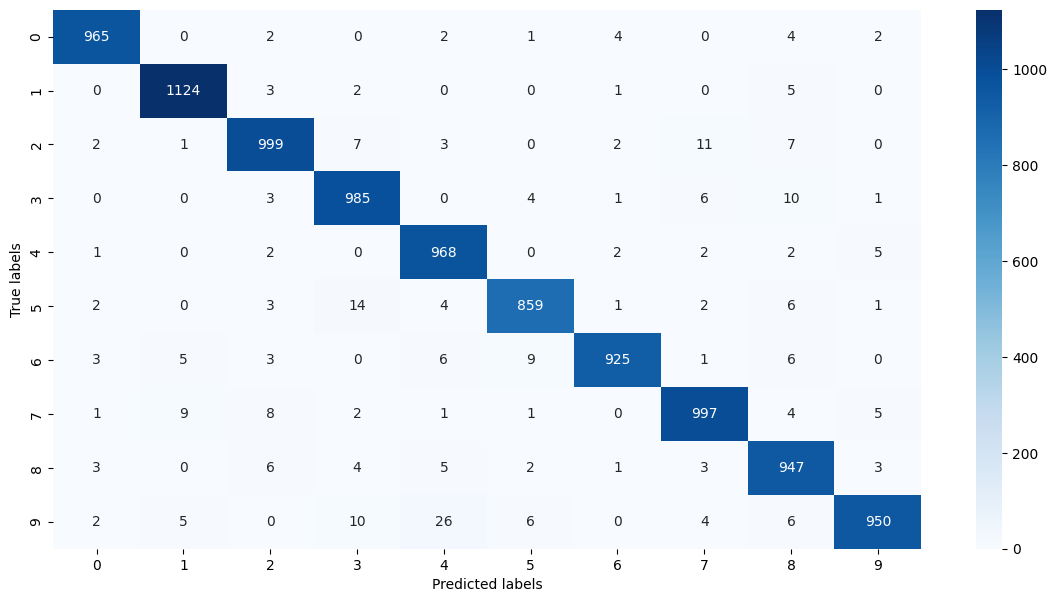

In [23]:
# 모델평가 - 혼돈행렬 ( Confusion Matrix )
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (14, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [24]:
# 모델 평가 방법 - 분류 보고서

print('|n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

|n               precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.95      0.99      0.97       982
           5       0.97      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [45]:
# 4.1.5 Fashion - MNIST 살펴보기

In [25]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()

In [26]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


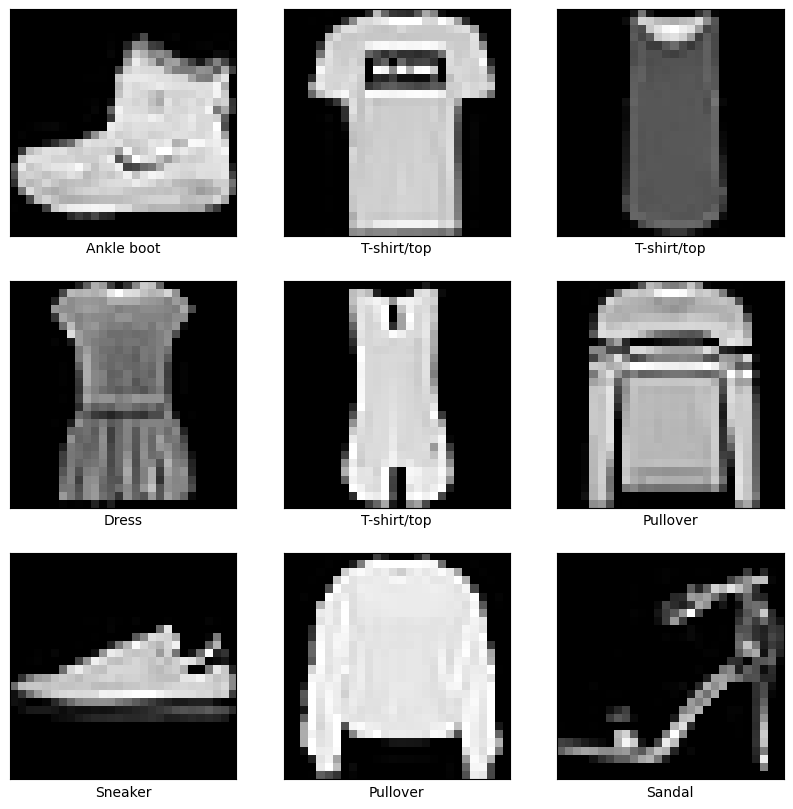

0 47919
1 15931
2 52134
3 40535
4 36785
5 26695
6 54941
7 10879
8 28788


In [27]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
random_idx = np.random.randint(60000, size = sample_size)

plt.figure(figsize = (10, 10))

for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

for i, idx in enumerate(random_idx):
    print(i, idx)

In [28]:
x_train = x_train / 255
x_test = x_test / 255

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 합니다.
first_model.add(Flatten(input_shape = (28, 28))) # (28, 28) -> .(28 * 28)
first_model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
first_model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
first_model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

c:\Dev\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
first_model.compile(optimizer='adam', # 옵티마이저 : Adam
              loss = 'categorical_crossentropy', # 손실 함수 : categorical_crossentropy
              metrics=['acc']) # 모니터링 할 평가지표 : acc

first_history = first_model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.6883 - loss: 0.9471 - val_acc: 0.7897 - val_loss: 0.6187
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8356 - loss: 0.4693 - val_acc: 0.8528 - val_loss: 0.4267
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8516 - loss: 0.4091 - val_acc: 0.8614 - val_loss: 0.3976
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8673 - loss: 0.3717 - val_acc: 0.8651 - val_loss: 0.3801
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8715 - loss: 0.3540 - val_acc: 0.8446 - val_loss: 0.4119
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8752 - loss: 0.3404 - val_acc: 0.8764 - val_loss: 0.3526
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8838 - loss: 0.3216 - val_acc: 0.8639 - val_loss: 0.3876
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8866 - loss: 0.3141 - val_acc: 0.8788 - val_loss: 0.3444
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

In [31]:
second_model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 합니다.
second_model.add(Flatten(input_shape = (28, 28)))                # (28, 28) -> .(28 * 28)
second_model.add(Dense(128, activation = 'relu'))                 # 128개의 출력을 가지는 Dense 층을 추가합니다.
second_model.add(Dense(64, activation = 'relu'))                   # 64개의 출력을 가지는 Dense 층
second_model.add(Dense(32, activation = 'relu'))                    # 32개의 출력을 가지는 Dense 층
second_model.add(Dense(10, activation = 'softmax'))                   # 10개의 출력을 가지는 신경망

second_model.compile(optimizer='adam',                        # 옵티마이저: Adam
              loss = 'categorical_crossentropy',               # 손실 함수: categorical_crossentropy
              metrics=['acc'])                                  # 모니터링 할 평가지표: acc(정확도)

second_history = second_model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.6821 - loss: 0.9180 - val_acc: 0.8379 - val_loss: 0.4626
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8458 - loss: 0.4348 - val_acc: 0.8528 - val_loss: 0.4095
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8585 - loss: 0.3956 - val_acc: 0.8615 - val_loss: 0.3925
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8694 - loss: 0.3587 - val_acc: 0.8632 - val_loss: 0.3750
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8760 - loss: 0.3386 - val_acc: 0.8729 - val_loss: 0.3520
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8844 - loss: 0.3150 - val_acc: 0.8758 - val_loss: 0.3392
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8886 - loss: 0.3045 - val_acc: 0.8751 - val_loss: 0.3440
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8909 - loss: 0.2923 - val_acc: 0.8762 - val_loss: 0.3513
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

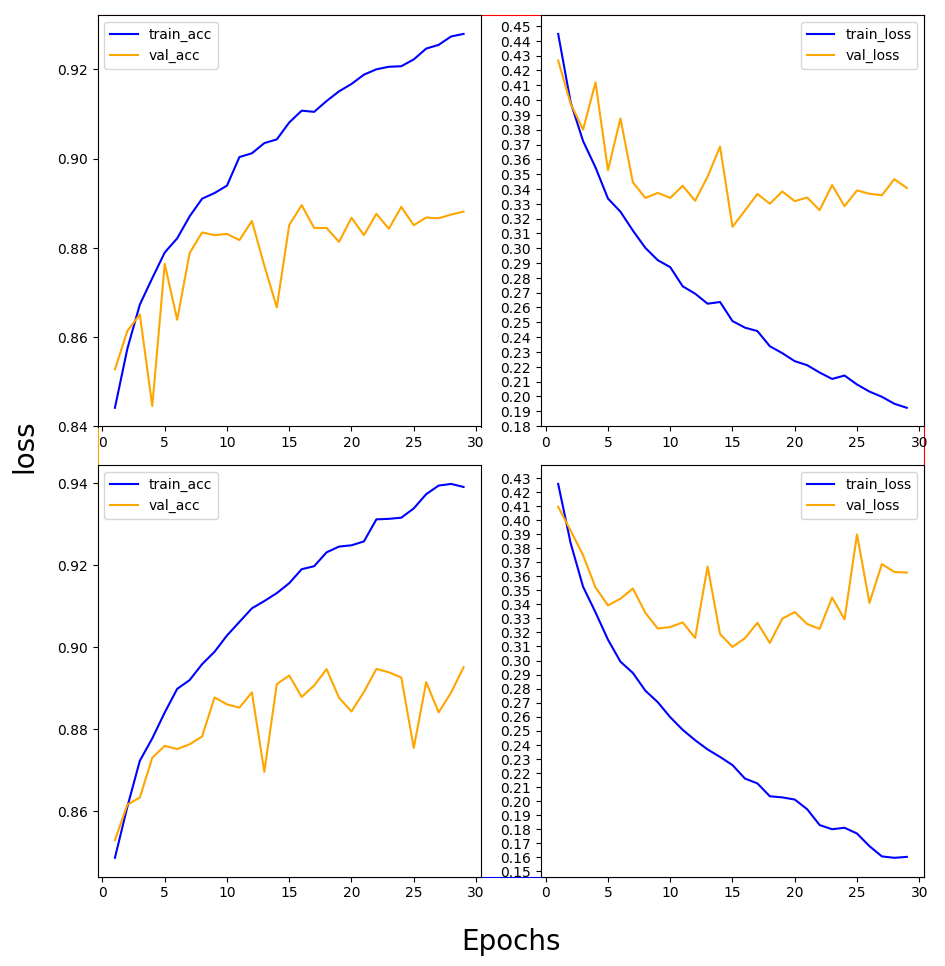

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())

    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('red')
    ax.spines['bottom'].set_color('blue')
    ax.spines['left'].set_color('orange')
    ax.spines['right'].set_color('red')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20, labelpad = 20)
    ax.set_xlabel('Epochs', size = 20, labelpad = 20)

    plt.tight_layout()
    plt.show()

draw_loss_acc(first_history, second_history, 30)

In [65]:
# 4.2 보스턴 주택 가격 예측

In [33]:
from tensorflow.keras.datasets.boston_housing import load_data

(x_train, y_train), (x_test, y_test) = load_data(path = 'boston_housing.npz', test_split = 0.2, seed = 777)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(404, 13) (404,)
(102, 13) (102,)


In [34]:
import numpy as np

mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) /std
x_test = (x_test - mean) /std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.33, random_state = 777)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (13, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

c:\Dev\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
history = model.fit(x_train, y_train, epochs = 300, validation_data = (x_val, y_val), verbose = 0)
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.3592 - mae: 2.4387


[9.583139419555664, 2.2791762351989746]

In [37]:
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import KFold

import numpy as np

(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

# 데이터 표준화
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)
# 여기까진 전부 동일합니다.
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

#----------------------------------------
# K-Fold를 진행해봅니다.
k = 3

# 주어진 데이터셋을 k만큼 등분합니다.
# 여기서는 3이므로 훈련 데이터셋(404개)를 3등분하여
# 1개는 검증셋으로, 나머지 2개는 훈련셋으로 활용합니다.
kfold = KFold(n_splits = k, shuffle = True, random_state = 777)

# 재사용을 위해 모델을 반환하는 함수를 정의합니다.
def get_model():
    model = Sequential()
    model.add(Dense(64, activation = 'relu', input_shape = (13, )))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(1))

    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

    return model

mae_list = [] # 테스트셋을 평가한 후 결과 mae를 담을 리스트를 선언합니다.

# k번 진행합니다.
for train_index, val_index in kfold.split(x_train):
    # 해당 인덱스는 무작위로 생성됩니다.
    # 무작위로 생성해주는 것은 과대적합을 피할 수 있는 좋은 방법입니다.
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # 모델을 불러옵니다.
    model = get_model()

    model.fit(x_train_fold, y_train_fold, epochs = 300, validation_data = (x_val_fold, y_val_fold), verbose = 0)

    _, test_mae = model.evaluate(x_test, y_test)
    mae_list.append(test_mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.4930 - mae: 2.3914
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4859 - mae: 2.0556
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4966 - mae: 2.2146


In [38]:
print(f'전체 결과: {mae_list}')
print(f'평균낸 결과를 최종 결과로 사용합니다: {np.mean(mae_list)}')

전체 결과: [2.298297643661499, 2.0300512313842773, 2.1882405281066895]
평균낸 결과를 최종 결과로 사용합니다: 2.1721964677174888


In [39]:
from google.colab import files

uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [19]:
import pandas as pd


train_df = pd.read_csv('/content/train.csv')
val_df = pd.read_csv('/content/val.csv')
test_df = pd.read_csv('/content/test.csv')

train_df['image'] = train_df['image'].apply(lambda x: str(x).replace('\\', '/'))
val_df['image'] = val_df['image'].apply(lambda x: str(x).replace('\\', '/'))
test_df['image'] = test_df['image'].apply(lambda x: str(x).replace('\\', '/'))

In [42]:
train_df.head()

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,./clothes_dataset/blue_shorts/256d854b55ac32ea...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,./clothes_dataset/red_pants/584f778aece14f07c2...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,./clothes_dataset/green_pants/ec543ca241cefb2b...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,./clothes_dataset/brown_shorts/c8db9e0f7010592...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,./clothes_dataset/white_dress/551373c80717c5b0...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [52]:
val_df.head()

,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,./clothes_dataset/black_shirt/caf19003d77246a8...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,./clothes_dataset/blue_pants/7e42face2c655f1bf...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,./clothes_dataset/red_dress/d46069bf0d2c1cc6bb...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,./clothes_dataset/blue_dress/fea68beee2e52c48d...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,./clothes_dataset/white_shoes/b378e85b811cfef4...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 제네레이터를 정의합니다.
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0 :
        return (num_samples // batch_size) + 1
    else :
        return num_samples // batch_size

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 합니다.
model.add(Flatten(input_shape = (112, 112, 3))) # (112, 112, 3) -> (112 * 112 * 3)
model.add(Dense(128, activation = 'relu')) # 128개의 출력을 가지는 Dense 층
model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
model.add(Dense(11, activation = 'sigmoid')) # 11개의 출력을 가지는 신경망

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['binary_accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
batch_size = 32
class_col = ['black', 'blue', 'brown', 'green', 'red', 'white',
             'dress', 'shirt', 'pants', 'shorts', 'shoes']

# Make Generator
# 2020.08.09 class_mode 수정: other -> raw
# class_mode: ['categorical', ['binary', 'sparse'], ['raw', 'multi_output'], ['input', 'None']]
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='',
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode="rgb",
    class_mode="raw",
    batch_size=batch_size,
    shuffle = True,
    seed=42
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='',
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='raw',
    batch_size=batch_size,
    shuffle=True
)

Found 0 validated image filenames.
Found 0 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 5578 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2391 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [30]:
model.fit(train_generator,
         steps_per_epoch=get_steps(len(train_df), batch_size),
         validation_data = val_generator,
         validation_steps=get_steps(len(val_df), batch_size),
         epochs = 10)

ValueError: Must provide at least one structure